# Решение Задачи "Кластеризация физической активности"

In [ ]:
!pip install opendatasets --quiet

## Загрузка данных

In [ ]:
import opendatasets as od

dataset_url = 'https://www.kaggle.com/competitions/clustering-physical-activity-data'

od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:

  elenami15


Your Kaggle Key:

  ········


100%|██████████| 103M/103M [02:18<00:00, 782kB/s]  



Extracting archive .\clustering-physical-activity-data/clustering-physical-activity-data.zip to .\clustering-physical-activity-data


## Исследование и предварительная обработка данных

In [ ]:
# иморитирование всех необходимых библиотек
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np

In [ ]:
X = pd.read_csv("Physical_Activity_Monitoring_unlabeled.csv")
X

,timestamp,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,handGyro1,handGyro2,...,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,ankleOrientation1,ankleOrientation2,ankleOrientation3,ankleOrientation4,subject_id
0,252.75,34.8750,0.902847,7.45872,6.032490,1.006100,7.44575,6.303650,-0.021952,0.004114,...,-0.025606,0.030239,-14.54470,27.3336,-5.766200,0.206416,0.348212,0.763201,-0.503652,5
1,3652.45,29.7500,-4.069330,3.76168,8.279720,-5.972500,3.22273,6.908970,0.116054,-0.375968,...,-0.670163,1.786200,-32.82570,-15.7719,-1.313950,0.578332,-0.566734,0.405888,-0.423791,2
2,504.76,34.3750,-2.007540,-9.60180,0.773674,-1.803500,-9.58937,1.073680,0.020131,0.042189,...,-0.009741,-0.006579,-18.81710,16.3089,25.292800,0.139776,0.676586,0.393796,0.606316,8
3,2801.61,31.9375,-13.262200,5.85443,0.899334,-13.611500,5.91511,0.840377,1.715630,-0.050492,...,-0.163470,-3.495570,-26.74180,34.3566,21.327400,0.416303,0.783387,0.306464,0.345075,2
4,441.01,33.5000,-0.013940,8.66540,4.398210,0.144153,8.56816,4.822200,-0.006938,-0.007383,...,-0.028172,-0.003737,-17.77980,-3.9981,10.995000,0.171133,-0.748343,0.252988,-0.588807,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534596,3479.53,33.8750,-9.084250,4.70122,2.890170,-9.689610,6.78077,3.975430,-0.157406,0.774189,...,0.424520,-0.856836,-25.00990,-23.5557,23.615300,0.318171,-0.701921,0.555778,-0.311745,5
534597,2448.49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.767710,-3.050980,-35.70240,31.8018,16.421800,0.435887,0.660643,0.371665,0.485200,5
534598,2479.84,34.6875,-6.367550,2.32131,2.207640,-6.362460,2.33049,2.607610,0.206349,-0.359415,...,-0.034144,-0.402013,-49.69220,20.6039,-0.917908,0.561652,0.297957,0.756767,0.151899,5
534599,3437.82,28.0625,5.461940,10.43640,-9.073300,8.348860,5.76518,-6.143210,3.543910,2.757300,...,0.352062,-5.577750,-34.15510,-11.0786,39.737500,0.062163,-0.798705,-0.056668,-0.595815,6


In [ ]:
print(X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534601 entries, 0 to 534600
Data columns (total 53 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   timestamp          534601 non-null  float64
 1   handTemperature    530560 non-null  float64
 2   handAcc16_1        530560 non-null  float64
 3   handAcc16_2        530560 non-null  float64
 4   handAcc16_3        530560 non-null  float64
 5   handAcc6_1         530560 non-null  float64
 6   handAcc6_2         530560 non-null  float64
 7   handAcc6_3         530560 non-null  float64
 8   handGyro1          530560 non-null  float64
 9   handGyro2          530560 non-null  float64
 10  handGyro3          530560 non-null  float64
 11  handMagne1         530560 non-null  float64
 12  handMagne2         530560 non-null  float64
 13  handMagne3         530560 non-null  float64
 14  handOrientation1   530560 non-null  float64
 15  handOrientation2   530560 non-null  float64
 16  ha

Мы видим, что все колонки содержат только числовые данные, однако достаточно много пропусков. Рассмотрим подробнее.

In [ ]:
missing_values = X.isnull().sum()
total_rows = len(X)

# Фильтруем только столбцы с пропусками
missing_data = missing_values[missing_values > 0].to_frame(name="Пропущенные значения")
missing_data["Процент пропущенных значений"] = (missing_data["Пропущенные значения"] / total_rows) * 100

columns_with_missing_values = missing_data.index.tolist()
columns_without_missing_values = X.columns[X.isnull().sum() == 0].tolist()

print("Столбцы с пропусками:")
print(columns_with_missing_values)
print("\nСтолбцы без пропусков:")
print(columns_without_missing_values)
print("\nДанные о пропусках:")
print(missing_data)

Столбцы с пропусками:
['handTemperature', 'handAcc16_1', 'handAcc16_2', 'handAcc16_3', 'handAcc6_1', 'handAcc6_2', 'handAcc6_3', 'handGyro1', 'handGyro2', 'handGyro3', 'handMagne1', 'handMagne2', 'handMagne3', 'handOrientation1', 'handOrientation2', 'handOrientation3', 'handOrientation4', 'chestTemperature', 'chestAcc16_1', 'chestAcc16_2', 'chestAcc16_3', 'chestAcc6_1', 'chestAcc6_2', 'chestAcc6_3', 'chestGyro1', 'chestGyro2', 'chestGyro3', 'chestMagne1', 'chestMagne2', 'chestMagne3', 'chestOrientation1', 'chestOrientation2', 'chestOrientation3', 'chestOrientation4', 'ankleTemperature', 'ankleAcc16_1', 'ankleAcc16_2', 'ankleAcc16_3', 'ankleAcc6_1', 'ankleAcc6_2', 'ankleAcc6_3', 'ankleGyro1', 'ankleGyro2', 'ankleGyro3', 'ankleMagne1', 'ankleMagne2', 'ankleMagne3', 'ankleOrientation1', 'ankleOrientation2', 'ankleOrientation3', 'ankleOrientation4']

Столбцы без пропусков:
['timestamp', 'subject_id']

Данные о пропусках:
                   Пропущенные значения  Процент пропущенных значений

Заполним пропущенные значения в колонках методом вычисления среднего значения в группе.

In [ ]:
col_missing = ['handTemperature', 'handAcc16_1', 'handAcc16_2', 'handAcc16_3', 'handAcc6_1',
               'handAcc6_2', 'handAcc6_3', 'handGyro1', 'handGyro2', 'handGyro3', 'handMagne1',
               'handMagne2', 'handMagne3', 'handOrientation1', 'handOrientation2', 'handOrientation3',
               'handOrientation4', 'chestTemperature', 'chestAcc16_1', 'chestAcc16_2', 'chestAcc16_3',
               'chestAcc6_1', 'chestAcc6_2', 'chestAcc6_3', 'chestGyro1', 'chestGyro2', 'chestGyro3',
               'chestMagne1', 'chestMagne2', 'chestMagne3', 'chestOrientation1', 'chestOrientation2',
               'chestOrientation3', 'chestOrientation4', 'ankleTemperature', 'ankleAcc16_1', 'ankleAcc16_2',
               'ankleAcc16_3', 'ankleAcc6_1', 'ankleAcc6_2', 'ankleAcc6_3', 'ankleGyro1', 'ankleGyro2',
               'ankleGyro3', 'ankleMagne1', 'ankleMagne2', 'ankleMagne3', 'ankleOrientation1', 'ankleOrientation2',
               'ankleOrientation3', 'ankleOrientation4']

for i in col_missing:
    X[i].fillna(X[i].mean(), inplace=True)

X.isna().sum()

timestamp            0
handTemperature      0
handAcc16_1          0
handAcc16_2          0
handAcc16_3          0
handAcc6_1           0
handAcc6_2           0
handAcc6_3           0
handGyro1            0
handGyro2            0
handGyro3            0
handMagne1           0
handMagne2           0
handMagne3           0
handOrientation1     0
handOrientation2     0
handOrientation3     0
handOrientation4     0
chestTemperature     0
chestAcc16_1         0
chestAcc16_2         0
chestAcc16_3         0
chestAcc6_1          0
chestAcc6_2          0
chestAcc6_3          0
chestGyro1           0
chestGyro2           0
chestGyro3           0
chestMagne1          0
chestMagne2          0
chestMagne3          0
chestOrientation1    0
chestOrientation2    0
chestOrientation3    0
chestOrientation4    0
ankleTemperature     0
ankleAcc16_1         0
ankleAcc16_2         0
ankleAcc16_3         0
ankleAcc6_1          0
ankleAcc6_2          0
ankleAcc6_3          0
ankleGyro1           0
ankleGyro2 

Пропущенных значений в данных не осталось, посмотрим теперь на матрицу корреляции признаков. Отдельно отобразим признаки с корреляцией выше 0.8.

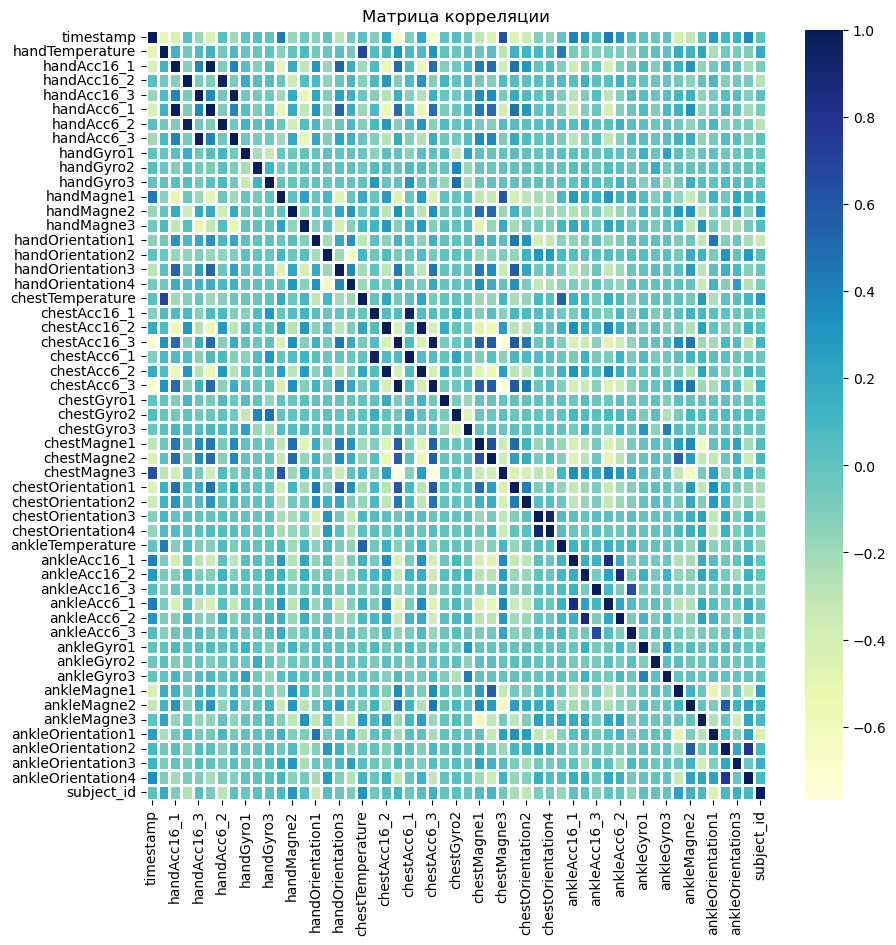

Признаки с корреляцией выше 0.8:
handAcc16_1 и handAcc6_1: 0.98
handAcc16_2 и handAcc6_2: 0.96
handAcc16_3 и handAcc6_3: 0.97
chestAcc16_1 и chestAcc6_1: 0.96
chestAcc16_2 и chestAcc6_2: 0.98
chestAcc16_3 и chestAcc6_3: 0.99
chestOrientation3 и chestOrientation4: 0.91
ankleAcc16_1 и ankleAcc6_1: 0.86
ankleAcc16_2 и ankleAcc6_2: 0.88


In [ ]:
correlation_matrix = X.corr()

plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, cmap="YlGnBu", linecolor='white', linewidths=1, annot=False, fmt=".2f")
plt.title('Матрица корреляции')
plt.show()


high_corr_pairs = []

# Находим пары признаков с корреляцией выше 0.8
for i in range(len(correlation_matrix.columns)):
    for k in range(i + 1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, k]) > 0.8:
            mean_i = correlation_matrix.columns[i]
            mean_j = correlation_matrix.columns[k]
            corr_mean = correlation_matrix.iloc[i, k]
            high_corr_pairs.append((mean_i, mean_j, corr_mean))

print("Признаки с корреляцией выше 0.8:")
for pair in high_corr_pairs:
    print(f"{pair[0]} и {pair[1]}: {pair[2]:.2f}")

Мы видим достаточно большое количество признаков с высокой корреляцией, далее удалим по одному из этих признаков.

In [ ]:
X = X.drop(columns=['handAcc16_1', 'handAcc16_2', 'handAcc16_3', 'chestAcc16_1', 'chestAcc16_2',
                   'chestAcc16_3', 'chestOrientation3', 'ankleAcc16_1', 'ankleAcc16_2'])

X.head()

,timestamp,handTemperature,handAcc6_1,handAcc6_2,handAcc6_3,handGyro1,handGyro2,handGyro3,handMagne1,handMagne2,...,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,ankleOrientation1,ankleOrientation2,ankleOrientation3,ankleOrientation4,subject_id
0,252.75,34.8750,1.006100,7.44575,6.303650,-0.021952,0.004114,-0.000752,-9.99538,7.22910,...,-0.025606,0.030239,-14.5447,27.3336,-5.76620,0.206416,0.348212,0.763201,-0.503652,5
1,3652.45,29.7500,-5.972500,3.22273,6.908970,0.116054,-0.375968,-0.012890,40.45580,-1.19692,...,-0.670163,1.786200,-32.8257,-15.7719,-1.31395,0.578332,-0.566734,0.405888,-0.423791,2
2,504.76,34.3750,-1.803500,-9.58937,1.073680,0.020131,0.042189,-0.011507,7.26741,24.43790,...,-0.009741,-0.006579,-18.8171,16.3089,25.29280,0.139776,0.676586,0.393796,0.606316,8
3,2801.61,31.9375,-13.611500,5.91511,0.840377,1.715630,-0.050492,-1.829000,46.48220,-7.83916,...,-0.163470,-3.495570,-26.7418,34.3566,21.32740,0.416303,0.783387,0.306464,0.345075,2
4,441.01,33.5000,0.144153,8.56816,4.822200,-0.006938,-0.007383,-0.032679,3.97764,-22.42320,...,-0.028172,-0.003737,-17.7798,-3.9981,10.99500,0.171133,-0.748343,0.252988,-0.588807,6


Удалим также ненужные столбцы 'timestamp', 'subject_id'.

In [ ]:
features = X.drop(columns=['timestamp', 'subject_id'])

И проведем нормализацию данных.

In [ ]:
scaler = StandardScaler()
X_new = scaler.fit_transform(features)

## Кластеризация

Будем использовать Метод локтя.

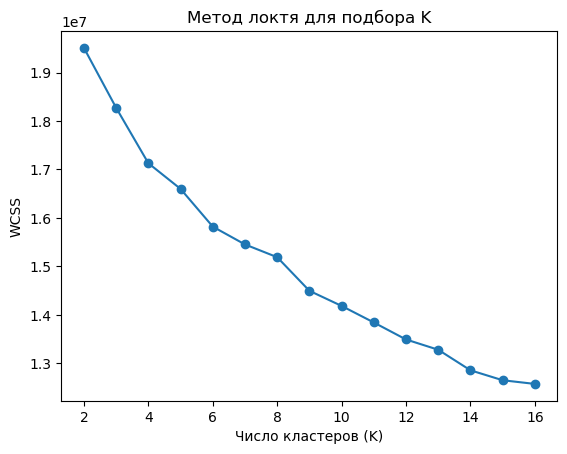

In [ ]:
wcss = []
K_values = range(2, 17)

for k in K_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_new)
    wcss.append(kmeans.inertia_)

plt.plot(K_values, wcss, marker='o', linestyle='-')
plt.xlabel("Число кластеров (K)")
plt.ylabel("WCSS")
plt.title("Метод локтя для подбора K")
plt.show()

Определим также оптимальное число кластеров.

In [ ]:
second_derivative = np.diff(wcss, n=2)
if len(second_derivative) > 0:
    optimal_k = list(K_values)[np.argmax(second_derivative) + 1]
    print(f"Оптимальное число кластеров: {optimal_k}")

Оптимальное число кластеров: 4


Далее применяем метод К-means для реализации кластеризации.

In [ ]:
n_clusters = optimal_k
clusterer = KMeans(n_clusters=n_clusters)
cluster_labels = clusterer.fit_predict(X)
inertia = clusterer.inertia_

In [ ]:
predictions = pd.DataFrame(cluster_labels, columns=['activityID'])
predictions = predictions.reset_index()

predictions

,index,activityID
0,0,3
1,1,2
2,2,0
3,3,2
4,4,3
...,...,...
534596,534596,2
534597,534597,1
534598,534598,1
534599,534599,2


In [ ]:
predictions['activityID'].unique()

array([3, 2, 0, 1])

In [ ]:
# преобразование номеров кластеров
predictions['new_label'] = -1

for index, row in predictions.iterrows():
    if row['activityID'] == 3:
        predictions.loc[index, 'new_label'] = 1
    if row['activityID'] == 2:
        predictions.loc[index, 'new_label'] = 2
    if row['activityID'] == 0:
        predictions.loc[index, 'new_label'] = 3
    if row['activityID'] == 1:
        predictions.loc[index, 'new_label'] = 4

predictions

,index,activityID,new_label
0,0,3,1
1,1,2,2
2,2,0,3
3,3,2,2
4,4,3,1
...,...,...,...
534596,534596,2,2
534597,534597,1,4
534598,534598,1,4
534599,534599,2,2


In [ ]:
predictions = predictions.drop(columns=['activityID'])
predictions.columns = ['index','activityID']
predictions.to_csv('submition5.csv', index=False)

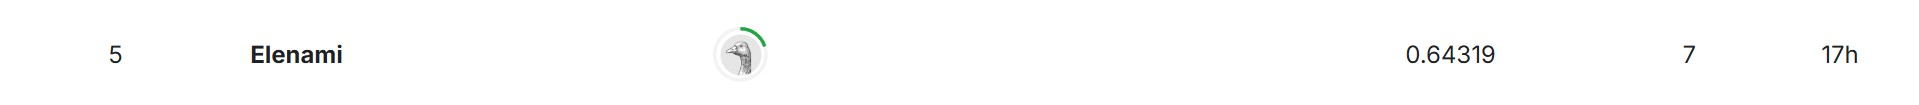

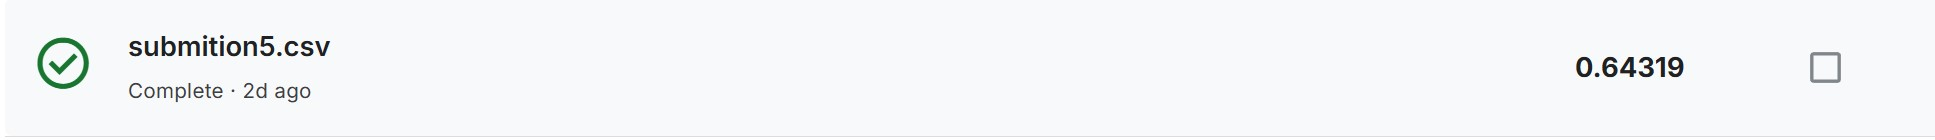